# GEOG5990M Final Assignment

Student ID number: 201900628


## Introduction
Generally, usage of automobile leads to city expansion, which lowers population density, therefore, more car owning and usage can be relevant to lower population density<a href="#ref1">[1]</a>.
To identify and visualise the regularity, this project investigates distribution and relationship of population density and car ownership in West Yorkshire.
The population density data is by residents per square kilometre, and the car owning proportion data is by household.
This project can serve the transport researchers and policymakers, by providing insight to automobile and traffic management.

## Importing packages

In [ ]:
# read in required packages
!pip install geoplot
!pip install git+https://github.com/pmdscully/geo_northarrow.git
!pip install matplotlib_scalebar

import pandas as pd
import numpy as np
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import cluster
from geo_northarrow import add_north_arrow
from matplotlib_scalebar.scalebar import ScaleBar

  Cloning https://github.com/pmdscully/geo_northarrow.git to /tmp/pip-req-build-3pq5j_ps
  Running command git clone --filter=blob:none --quiet https://github.com/pmdscully/geo_northarrow.git /tmp/pip-req-build-3pq5j_ps
  Resolved https://github.com/pmdscully/geo_northarrow.git to commit 963bdd271707a3bcaa47b2d83d92b88ae0b10950
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


## Data preparing
The population density and car ownership datasets by MSOA in all the five metropolitan districts of West Yorkshire are 2021 UK census data acquired from https://www.nomisweb.co.uk/ in CSV files.  The spatial data of MSOAs is from https://geoportal.statistics.gov.uk/ in Geojson file. All the datasets are uploaded to GitHub for usage. The datasets are read from GitHub, then checked for data type, completeness and mistakes. The spatial data of MSOAs is clipped to the range of five metropolitan districts in West Yorkshire after loaded.

In [238]:
#Import MSOA data
msoa_part = gpd.read_file('https://github.com/FanjunGeng/Final_Project_GEOG5990_201900628/raw/refs/heads/main/msoa_part.geojson')
msoa_part.head()

FID   MSOA21CD      MSOA21NM MSOA21NMW   BNG_E   BNG_N       LAT     LONG  \
0  2253  E02002351     Leeds 022            435900  438914  53.84525 -1.45585   
1  2230  E02002328  Kirklees 058            409345  406690  53.55677 -1.86040   
2  2136  E02002234  Bradford 052            419261  431131  53.77618 -1.70922   
3  1042  E02001098    Oldham 001            392843  410049  53.58699 -2.10958   
4  1472  E02001535  Barnsley 027            426322  400553  53.50104 -1.60465   

                               GlobalID  \
0  7743dfb6-9581-4505-aa41-daad96e57796   
1  8c8840de-3c3b-4b15-a69b-943834d2e1d6   
2  03d8e45e-b8fb-468d-9fc5-837a72dd9724   
3  e2dfa8a8-1c96-4153-ac05-98160a7717a1   
4  8890e7b2-4ed2-40fa-9c00-669b6546584d   

                                            geometry  
0  POLYGON ((-1.44755 53.87144, -1.44699 53.87113...  
1  POLYGON ((-1.78049 53.59365, -1.78007 53.59335...  
2  POLYGON ((-1.70342 53.78341, -1.70261 53.78226...  
3  POLYGON ((-2.11067 53.59969, -2.10854 53.59899...  
4  POLYGON ((-1.62702 53.56359, -1.62228 53.56283...

In [239]:
#Clip MSOA data to West Yorkshire
wy_msoa = msoa_part.loc[msoa_part['MSOA21NM'].str.contains('Leeds|Wakefield|Bradford|Calderdale|Kirklees'),:]
wy_msoa.head()

FID   MSOA21CD        MSOA21NM MSOA21NMW   BNG_E   BNG_N       LAT  \
0  2253  E02002351       Leeds 022            435900  438914  53.84525   
1  2230  E02002328    Kirklees 058            409345  406690  53.55677   
2  2136  E02002234    Bradford 052            419261  431131  53.77618   
5  2207  E02002305    Kirklees 035            416163  417322  53.65217   
8  2159  E02002257  Calderdale 014            407698  424659  53.71830   

      LONG                              GlobalID  \
0 -1.45585  7743dfb6-9581-4505-aa41-daad96e57796   
1 -1.86040  8c8840de-3c3b-4b15-a69b-943834d2e1d6   
2 -1.70922  03d8e45e-b8fb-468d-9fc5-837a72dd9724   
5 -1.75694  75e7b125-031d-4ef7-a8b5-a74fe5458569   
8 -1.88483  4dec5cde-e8db-439d-8520-583a3aa532a7   

                                            geometry  
0  POLYGON ((-1.44755 53.87144, -1.44699 53.87113...  
1  POLYGON ((-1.78049 53.59365, -1.78007 53.59335...  
2  POLYGON ((-1.70342 53.78341, -1.70261 53.78226...  
5  POLYGON ((-1.75671 53.66151, -1.75148 53.66106...  
8  POLYGON ((-1.88175 53.72222, -1.88156 53.72058...

In [ ]:
#Check missing values and data type
wy_msoa.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 301 entries, 0 to 767
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   FID        301 non-null    int32   
 1   MSOA21CD   301 non-null    object  
 2   MSOA21NM   301 non-null    object  
 3   MSOA21NMW  301 non-null    object  
 4   BNG_E      301 non-null    int32   
 5   BNG_N      301 non-null    int32   
 6   LAT        301 non-null    float64 
 7   LONG       301 non-null    float64 
 8   GlobalID   301 non-null    object  
 9   geometry   301 non-null    geometry
dtypes: float64(2), geometry(1), int32(3), object(4)
memory usage: 22.3+ KB


In [ ]:
#Check CRS
wy_msoa.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
#Check spatially
wy_msoa.explore()

In [ ]:
#Read population density from Github
density = pd.read_csv('https://raw.githubusercontent.com/FanjunGeng/Final_Project_GEOG5990_201900628/refs/heads/main/density.csv')
density.head()

2021 super output area - middle layer   mnemonic  population density
0                             Leeds 001  E02002330              2073.3
1                             Leeds 002  E02002331               341.8
2                             Leeds 003  E02002332              2243.0
3                             Leeds 004  E02002333               871.5
4                             Leeds 005  E02002334               300.0

In [ ]:
#Check missing values and data type
density.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 3 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   2021 super output area - middle layer  301 non-null    object 
 1   mnemonic                               301 non-null    object 
 2   population density                     301 non-null    float64
dtypes: float64(1), object(2)
memory usage: 7.2+ KB


In [ ]:
#Check mistakes
density.describe()

population density
count          301.000000
mean          2987.282724
std           2597.852605
min             94.100000
25%           1123.900000
50%           2512.700000
75%           4173.200000
max          19894.800000

In [ ]:
# read car ownership dataset from Github
owncar = pd.read_csv('https://raw.githubusercontent.com/FanjunGeng/Final_Project_GEOG5990_201900628/refs/heads/main/owncar.csv')
owncar.head()

2021 super output area - middle layer   mnemonic  Total  \
0                             Leeds 001  E02002330   3034   
1                             Leeds 002  E02002331   3078   
2                             Leeds 003  E02002332   2877   
3                             Leeds 004  E02002333   3726   
4                             Leeds 005  E02002334   3334   

   No cars or vans in household  1 or more cars or vans in household  
0                           280                                 2754  
1                           639                                 2439  
2                           483                                 2394  
3                           774                                 2952  
4                           418                                 2916

In [ ]:
#Check missing values and data type
owncar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 5 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   2021 super output area - middle layer  301 non-null    object
 1   mnemonic                               301 non-null    object
 2   Total                                  301 non-null    int64 
 3   No cars or vans in household           301 non-null    int64 
 4   1 or more cars or vans in household    301 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 11.9+ KB


In [ ]:
#Check mistakes
owncar.describe()

Total  No cars or vans in household  \
count   301.000000                    301.000000   
mean   3232.016611                    841.930233   
std     684.660419                    434.867511   
min    2104.000000                    204.000000   
25%    2726.000000                    528.000000   
50%    3067.000000                    755.000000   
75%    3655.000000                   1064.000000   
max    5832.000000                   2787.000000   

       1 or more cars or vans in household  
count                           301.000000  
mean                           2390.086379  
std                             646.652611  
min                             923.000000  
25%                            1959.000000  
50%                            2318.000000  
75%                            2754.000000  
max                            4798.000000

All the datasets are complete and no obvious error found.
As the original data of car ownership only includes numbers of households in different situations, the car owning proportions are calculated from the original data. After the calculation, the datasets are joined together for further analysis. In the joined dataset, the useless empty and repetitive columns of data are dropped to tidy the data.

In [ ]:
#Calculation of car owning proportions
owncar['own_proportion'] = owncar['1 or more cars or vans in household']/owncar['Total']
owncar.head()

2021 super output area - middle layer   mnemonic  Total  \
0                             Leeds 001  E02002330   3034   
1                             Leeds 002  E02002331   3078   
2                             Leeds 003  E02002332   2877   
3                             Leeds 004  E02002333   3726   
4                             Leeds 005  E02002334   3334   

   No cars or vans in household  1 or more cars or vans in household  \
0                           280                                 2754   
1                           639                                 2439   
2                           483                                 2394   
3                           774                                 2952   
4                           418                                 2916   

   own_proportion  
0        0.907713  
1        0.792398  
2        0.832117  
3        0.792271  
4        0.874625

In [ ]:
#Join population density and car ownership
car_density = owncar.merge(density, how='left', left_on='mnemonic', right_on='mnemonic')
car_density.head()

2021 super output area - middle layer_x   mnemonic  Total  \
0                               Leeds 001  E02002330   3034   
1                               Leeds 002  E02002331   3078   
2                               Leeds 003  E02002332   2877   
3                               Leeds 004  E02002333   3726   
4                               Leeds 005  E02002334   3334   

   No cars or vans in household  1 or more cars or vans in household  \
0                           280                                 2754   
1                           639                                 2439   
2                           483                                 2394   
3                           774                                 2952   
4                           418                                 2916   

   own_proportion 2021 super output area - middle layer_y  population density  
0        0.907713                               Leeds 001              2073.3  
1        0.792398                               Leeds 002               341.8  
2        0.832117                               Leeds 003              2243.0  
3        0.792271                               Leeds 004               871.5  
4        0.874625                               Leeds 005               300.0

<Axes: xlabel='population density', ylabel='own_proportion'>

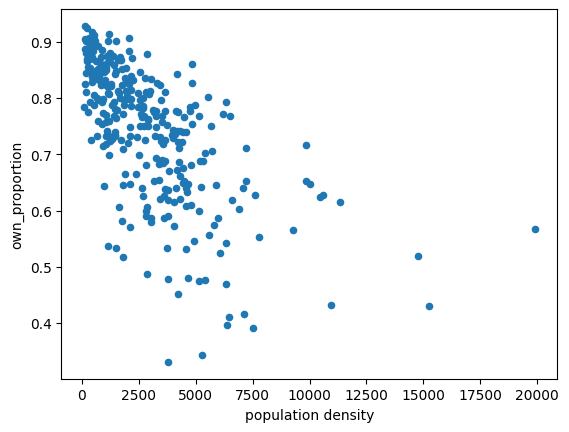

In [ ]:
#Check the joined data by draft plotting
car_density.plot.scatter(x='population density', y='own_proportion')

In [ ]:
#Join spatial data of MSOAs
cds = wy_msoa.merge(car_density, how='left', left_on='MSOA21CD', right_on='mnemonic')
cds.head()

FID   MSOA21CD        MSOA21NM MSOA21NMW   BNG_E   BNG_N       LAT  \
0  2253  E02002351       Leeds 022            435900  438914  53.84525   
1  2230  E02002328    Kirklees 058            409345  406690  53.55677   
2  2136  E02002234    Bradford 052            419261  431131  53.77618   
3  2207  E02002305    Kirklees 035            416163  417322  53.65217   
4  2159  E02002257  Calderdale 014            407698  424659  53.71830   

      LONG                              GlobalID  \
0 -1.45585  7743dfb6-9581-4505-aa41-daad96e57796   
1 -1.86040  8c8840de-3c3b-4b15-a69b-943834d2e1d6   
2 -1.70922  03d8e45e-b8fb-468d-9fc5-837a72dd9724   
3 -1.75694  75e7b125-031d-4ef7-a8b5-a74fe5458569   
4 -1.88483  4dec5cde-e8db-439d-8520-583a3aa532a7   

                                            geometry  \
0  POLYGON ((-1.44755 53.87144, -1.44699 53.87113...   
1  POLYGON ((-1.78049 53.59365, -1.78007 53.59335...   
2  POLYGON ((-1.70342 53.78341, -1.70261 53.78226...   
3  POLYGON ((-1.75671 53.66151, -1.75148 53.66106...   
4  POLYGON ((-1.88175 53.72222, -1.88156 53.72058...   

  2021 super output area - middle layer_x   mnemonic  Total  \
0                               Leeds 022  E02002351   2352   
1                            Kirklees 058  E02002328   3068   
2                            Bradford 052  E02002234   3202   
3                            Kirklees 035  E02002305   2664   
4                          Calderdale 014  E02002257   2139   

   No cars or vans in household  1 or more cars or vans in household  \
0                           218                                 2134   
1                           369                                 2699   
2                          1667                                 1535   
3                          1010                                 1654   
4                           755                                 1384   

   own_proportion 2021 super output area - middle layer_y  population density  
0        0.907313                               Leeds 022               331.9  
1        0.879726                            Kirklees 058               204.9  
2        0.479388                            Bradford 052              4647.1  
3        0.620871                            Kirklees 035              3423.4  
4        0.647031                          Calderdale 014             10041.4

In [ ]:
#Drop unwanted columns
cds = cds.drop(columns = ['MSOA21NMW','mnemonic','2021 super output area - middle layer_x','2021 super output area - middle layer_y'])
cds.head()

FID   MSOA21CD        MSOA21NM   BNG_E   BNG_N       LAT     LONG  \
0  2253  E02002351       Leeds 022  435900  438914  53.84525 -1.45585   
1  2230  E02002328    Kirklees 058  409345  406690  53.55677 -1.86040   
2  2136  E02002234    Bradford 052  419261  431131  53.77618 -1.70922   
3  2207  E02002305    Kirklees 035  416163  417322  53.65217 -1.75694   
4  2159  E02002257  Calderdale 014  407698  424659  53.71830 -1.88483   

                               GlobalID  \
0  7743dfb6-9581-4505-aa41-daad96e57796   
1  8c8840de-3c3b-4b15-a69b-943834d2e1d6   
2  03d8e45e-b8fb-468d-9fc5-837a72dd9724   
3  75e7b125-031d-4ef7-a8b5-a74fe5458569   
4  4dec5cde-e8db-439d-8520-583a3aa532a7   

                                            geometry  Total  \
0  POLYGON ((-1.44755 53.87144, -1.44699 53.87113...   2352   
1  POLYGON ((-1.78049 53.59365, -1.78007 53.59335...   3068   
2  POLYGON ((-1.70342 53.78341, -1.70261 53.78226...   3202   
3  POLYGON ((-1.75671 53.66151, -1.75148 53.66106...   2664   
4  POLYGON ((-1.88175 53.72222, -1.88156 53.72058...   2139   

   No cars or vans in household  1 or more cars or vans in household  \
0                           218                                 2134   
1                           369                                 2699   
2                          1667                                 1535   
3                          1010                                 1654   
4                           755                                 1384   

   own_proportion  population density  
0        0.907313               331.9  
1        0.879726               204.9  
2        0.479388              4647.1  
3        0.620871              3423.4  
4        0.647031             10041.4

In [ ]:
#Check spatially joined data
cds.explore('population density', cmap='OrRd')

In [ ]:
#Check spatially joined data
cds.explore('own_proportion', cmap='GnBu')

## K-means clustering
K-means clustering is an unsupervised machine learning modeling method to classify the data by similarity. It clusters data by identifing shortest distances from the data points to the centroids of clusters. In this project, it can group MSOAs with similar characteristics of population density and car ownership, which helps to investigate spatial pattern of the features.

As the values of population density and car owning proportion are in different scales, the population density is standarised to 0-1 before clustering, as 'pd_sta'. The maximum value of population density is represented by 1, while other numbers are represented by dividing the maximum value.

In [ ]:
#Check maximum value of population density
pdm = cds['population density'].max()
print(pdm)

19894.8


In [ ]:
#Standardise population density
cds['pd_sta'] = cds['population density']/pdm
cds['pd_sta'].head()

0    0.016683
1    0.010299
2    0.233584
3    0.172075
4    0.504725
Name: pd_sta, dtype: float64

The appropriate number of clusters can be derived by using the elbow method. In this method, different numbers of clusters (k) from 1 to 10 are tested, sum of squared distances of the clusters numbers (k) are plotted. According to the plot, the 'elbow' appeared at k=4, thus division of 4 clusters should be applied.

Text(0, 0.5, 'Squared Distances Sum')

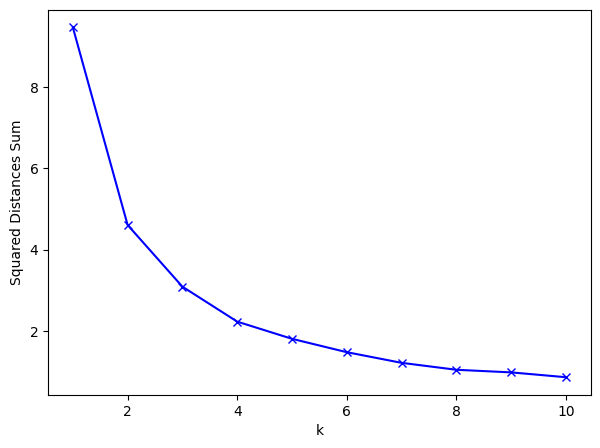

In [ ]:
#Elbow method

#Set sum of squared distances and clusters numbers testing range
sd_sum = []
k = range(1,11)

#Traverse the clusters numbers
for i in k:
  km = cluster.KMeans(n_clusters=i, init="random", random_state=86)
  km = km.fit(cds[['own_proportion','pd_sta']].values)
  sd_sum.append(km.inertia_)

#Plot to define 'elbow'
plt.figure(figsize=(7,5))
plt.plot(k,sd_sum,'bx-')
plt.xlabel('k')
plt.ylabel('Squared Distances Sum')


Then the model clustering the data into 4 categories is run, and clustering results of MSOAs are added to the dataset.

In [ ]:
#Clustering by k=4
km4 = cluster.KMeans(n_clusters=4, init="random", random_state=86)
km4cls = km4.fit(cds[['own_proportion','pd_sta']].values)
km4cls.labels_

#Add clustering results
cds['cluster']=km4cls.labels_
cds.head()

FID   MSOA21CD        MSOA21NM   BNG_E   BNG_N       LAT     LONG  \
0  2253  E02002351       Leeds 022  435900  438914  53.84525 -1.45585   
1  2230  E02002328    Kirklees 058  409345  406690  53.55677 -1.86040   
2  2136  E02002234    Bradford 052  419261  431131  53.77618 -1.70922   
3  2207  E02002305    Kirklees 035  416163  417322  53.65217 -1.75694   
4  2159  E02002257  Calderdale 014  407698  424659  53.71830 -1.88483   

                               GlobalID  \
0  7743dfb6-9581-4505-aa41-daad96e57796   
1  8c8840de-3c3b-4b15-a69b-943834d2e1d6   
2  03d8e45e-b8fb-468d-9fc5-837a72dd9724   
3  75e7b125-031d-4ef7-a8b5-a74fe5458569   
4  4dec5cde-e8db-439d-8520-583a3aa532a7   

                                            geometry  Total  \
0  POLYGON ((-1.44755 53.87144, -1.44699 53.87113...   2352   
1  POLYGON ((-1.78049 53.59365, -1.78007 53.59335...   3068   
2  POLYGON ((-1.70342 53.78341, -1.70261 53.78226...   3202   
3  POLYGON ((-1.75671 53.66151, -1.75148 53.66106...   2664   
4  POLYGON ((-1.88175 53.72222, -1.88156 53.72058...   2139   

   No cars or vans in household  1 or more cars or vans in household  \
0                           218                                 2134   
1                           369                                 2699   
2                          1667                                 1535   
3                          1010                                 1654   
4                           755                                 1384   

   own_proportion  population density    pd_sta  cluster  
0        0.907313               331.9  0.016683        0  
1        0.879726               204.9  0.010299        0  
2        0.479388              4647.1  0.233584        2  
3        0.620871              3423.4  0.172075        2  
4        0.647031             10041.4  0.504725        3

After modeling, a copy of dataset which only includes necessary data for visualisation is created, in which names of clusters are edited to 1-4 in advance for interpretations. Then calculations of mean and quantiles values are carried out for model explanation. Interpretations of the modeling results are derived in the following 'Data Visualisation' part.

In [ ]:
#Edit cluster names for display

#Create copy with necessary data
cds_v = cds.drop(columns=['Total','No cars or vans in household','1 or more cars or vans in household'])

#Edit data type of cluster name
cds_v['cluster_v'] = cds_v['cluster'] +1

#Check
cds_v.head()

FID   MSOA21CD        MSOA21NM   BNG_E   BNG_N       LAT     LONG  \
0  2253  E02002351       Leeds 022  435900  438914  53.84525 -1.45585   
1  2230  E02002328    Kirklees 058  409345  406690  53.55677 -1.86040   
2  2136  E02002234    Bradford 052  419261  431131  53.77618 -1.70922   
3  2207  E02002305    Kirklees 035  416163  417322  53.65217 -1.75694   
4  2159  E02002257  Calderdale 014  407698  424659  53.71830 -1.88483   

                               GlobalID  \
0  7743dfb6-9581-4505-aa41-daad96e57796   
1  8c8840de-3c3b-4b15-a69b-943834d2e1d6   
2  03d8e45e-b8fb-468d-9fc5-837a72dd9724   
3  75e7b125-031d-4ef7-a8b5-a74fe5458569   
4  4dec5cde-e8db-439d-8520-583a3aa532a7   

                                            geometry  own_proportion  \
0  POLYGON ((-1.44755 53.87144, -1.44699 53.87113...        0.907313   
1  POLYGON ((-1.78049 53.59365, -1.78007 53.59335...        0.879726   
2  POLYGON ((-1.70342 53.78341, -1.70261 53.78226...        0.479388   
3  POLYGON ((-1.75671 53.66151, -1.75148 53.66106...        0.620871   
4  POLYGON ((-1.88175 53.72222, -1.88156 53.72058...        0.647031   

   population density    pd_sta  cluster  cluster_v  
0               331.9  0.016683        0          1  
1               204.9  0.010299        0          1  
2              4647.1  0.233584        2          3  
3              3423.4  0.172075        2          3  
4             10041.4  0.504725        3          4

In [ ]:
cds_v.groupby('cluster_v').count()

FID  MSOA21CD  MSOA21NM  BNG_E  BNG_N  LAT  LONG  GlobalID  \
cluster_v                                                               
1          134       134       134    134    134  134   134       134   
2           96        96        96     96     96   96    96        96   
3           60        60        60     60     60   60    60        60   
4           11        11        11     11     11   11    11        11   

           geometry  own_proportion  population density  pd_sta  cluster  
cluster_v                                                                 
1               134             134                 134     134      134  
2                96              96                  96      96       96  
3                60              60                  60      60       60  
4                11              11                  11      11       11

In [ ]:
#Clusters:mean
cds_cluster_mean = cds_v.groupby('cluster_v')[['own_proportion','population density']].mean()
cds_cluster_mean

own_proportion  population density
cluster_v                                    
1                0.830389         1087.788806
2                0.740746         3627.923958
3                0.561938         4548.293333
4                0.581675        12020.918182

In [ ]:
#Clusters: min(0), 25%(0.25), median(0.5), 75%(0.75), max(1)
cds_cluster_quantile = cds_v.groupby('cluster_v')[['own_proportion','population density']].quantile([0,0.25, 0.5, 0.75,1])
cds_cluster_quantile

own_proportion  population density
cluster_v                                         
1         0.00        0.713854              94.100
          0.25        0.796352             513.450
          0.50        0.836016            1067.450
          0.75        0.869099            1505.325
          1.00        0.928321            2859.500
2         0.00        0.639562             993.800
          0.25        0.701225            2773.025
          0.50        0.742645            3485.400
          0.75        0.776146            4319.475
          1.00        0.860907            7210.300
3         0.00        0.330662            1142.200
          0.25        0.530061            3607.325
          0.50        0.587185            4533.950
          0.75        0.622053            5829.800
          1.00        0.652985            7761.200
4         0.00        0.429759            9289.300
          0.25        0.542550            9937.750
          0.50        0.615747           10601.000
          0.75        0.637293           13041.800
          1.00        0.717210           19894.800

##Data Visualisation




### Non-spatial visualisation
The non-spatial visualisation demonstrates the correlation between population density and car owning proportion in West Yorkshire. Seaborn Jointplot is applied to plot the distribution of values and relationship of the values. The 'Jointplot' visualisation here combines scatter plot and curved line graphs of clusters together, to explanin distribution and correlation of the dara at the same time. The cluster names in the legend are edited by calculations in advance. The colour of the marker represents the belonging cluster of MSOA, to present the modeling results, meanwhile, the colours are set to 'colorblind' palette for accessibility consideration. Title and legend are added, Scales of axes are edited to accommodate all the data spots, name and font size of axle labels are also edited.


(0.0, 1.0)

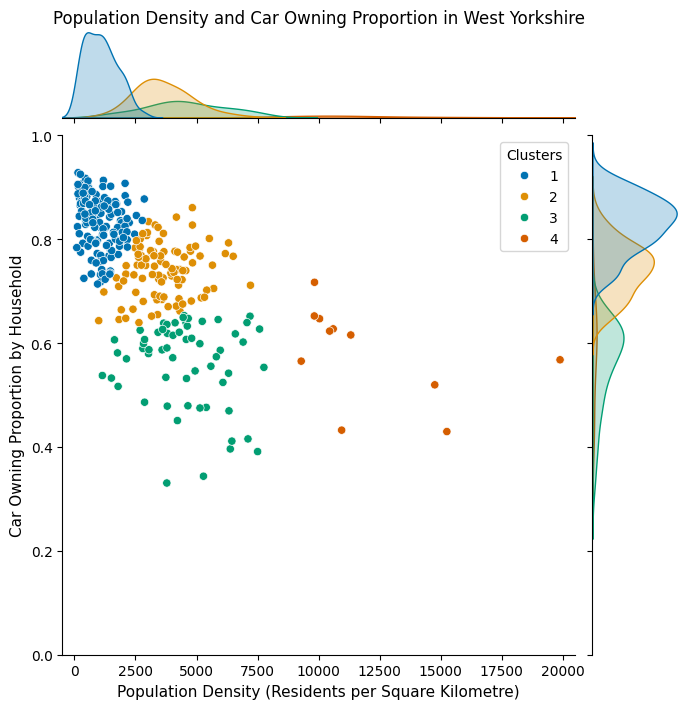

In [ ]:
#Non-spatial visualisation
sns.jointplot(data=cds_v, x='population density', y='own_proportion',
              height=7, hue='cluster_v', palette='colorblind')

#Edit title
plt.title('Population Density and Car Owning Proportion in West Yorkshire''\n\n\n\n\n', fontsize=12)

#Edit legend
plt.legend(title='Clusters',loc='upper right')

#Edit axes
plt.xlabel('Population Density (Residents per Square Kilometre)', fontsize=11)
plt.xlim(-500,20500)
plt.ylabel('Car Owning Proportion by Household', fontsize=11)
plt.ylim(0,1)

This plot interprets the modeling results from non-spatial perspective. To summerise, the result accords with the regularity that relationship between population density and car owning proportion is negative<a href="#ref1">[1]</a>, which can be visualised intuitionally by the plot. The features of population density and car ownership of MSOAs in West Yorkshire are classified into 4 clusters:

1.   Low density, high car owning proportion
2.   Medium density, medium and high car owning proportion
3.   Medium and high density, low car owning proportion
4.   Extremely high density, low car owning proportion

The cluster 1 has lowest population densities and highest car owning proportions, about 75% of MSOAs in this group have population density lower than 1500 people per square kilometre and car owning proportions higher than 80%. From cluster 1 to cluster 3, the overall population density increased and car owning proportions decreased, while the grow of overall population density from cluster 2 to 3 is slight than which from cluster 1 to 2. The overall car owning proportions of cluster 4 is similar to cluster 3, however, the population densities of MSOAs in this cluster are particularly high, which are all over 9000 people per square kilometre. In addition, numbers of MSOAs in the clusters reduce from cluster 1 to cluster 4.

### Spatial visualisation
The spatial visualisation presents feature pattern of population density and car owning proportion in West Yorkshire by the result of clustering above. Before visualisation, names of clusters are edited according to results of the non-spatial visualisation by calculations, and the coordinate system is converted to British National Grid (EPSG:27700) to reduce distortion when mapping. The map uses red and blue for colouring, which could avoid accessibility issues for colour blind groups. Outline of MSOAs ard edited to help identifing. Axes are removed and title is added. The legend is set to the bottom of the map to accommodate the text. North arrow and scale bar are also added by functions from 'geo_northarrow' and 'matplotlib_scalebar'.

In [ ]:
#Edit CRS and cluster name for display

#Convert CRS to reduce distortion
cds_v=cds_v.to_crs(27700)

#Edit data type of cluster name
cds_v['cluster_spv'] = cds_v['cluster'].astype('string')

#Edit cluster name
cds_v.loc[cds_v['cluster_spv'] == '0', 'cluster_spv'] ='Cluster 1: Low density, high car owning proportion'
cds_v.loc[cds_v['cluster_spv'] == '1', 'cluster_spv'] ='Cluster 2: Medium density, medium and high car owning proportion'
cds_v.loc[cds_v['cluster_spv'] == '2', 'cluster_spv'] ='Cluster 3: Medium and high density, low car owning proportion'
cds_v.loc[cds_v['cluster_spv'] == '3', 'cluster_spv'] ='Cluster 4: Extremely high density, low car owning proportion'

#Check
cds_v.head()

FID   MSOA21CD        MSOA21NM   BNG_E   BNG_N       LAT     LONG  \
0  2253  E02002351       Leeds 022  435900  438914  53.84525 -1.45585   
1  2230  E02002328    Kirklees 058  409345  406690  53.55677 -1.86040   
2  2136  E02002234    Bradford 052  419261  431131  53.77618 -1.70922   
3  2207  E02002305    Kirklees 035  416163  417322  53.65217 -1.75694   
4  2159  E02002257  Calderdale 014  407698  424659  53.71830 -1.88483   

                               GlobalID  \
0  7743dfb6-9581-4505-aa41-daad96e57796   
1  8c8840de-3c3b-4b15-a69b-943834d2e1d6   
2  03d8e45e-b8fb-468d-9fc5-837a72dd9724   
3  75e7b125-031d-4ef7-a8b5-a74fe5458569   
4  4dec5cde-e8db-439d-8520-583a3aa532a7   

                                            geometry  own_proportion  \
0  POLYGON ((436422.723 441833.485, 436459.62 441...        0.907313   
1  POLYGON ((414626.356 410807.901, 414654.64 410...        0.879726   
2  POLYGON ((419639.445 431938.774, 419693.167 43...        0.479388   
3  POLYGON ((416174.487 418363.704, 416520.69 418...        0.620871   
4  POLYGON ((407900.222 425096.529, 407913.577 42...        0.647031   

   population density    pd_sta  cluster  cluster_v  \
0               331.9  0.016683        0          1   
1               204.9  0.010299        0          1   
2              4647.1  0.233584        2          3   
3              3423.4  0.172075        2          3   
4             10041.4  0.504725        3          4   

                                         cluster_spv  
0  Cluster 1: Low density, high car owning propor...  
1  Cluster 1: Low density, high car owning propor...  
2  Cluster 3: Medium and high density, low car ow...  
3  Cluster 3: Medium and high density, low car ow...  
4  Cluster 4: Extremely high density, low car own...

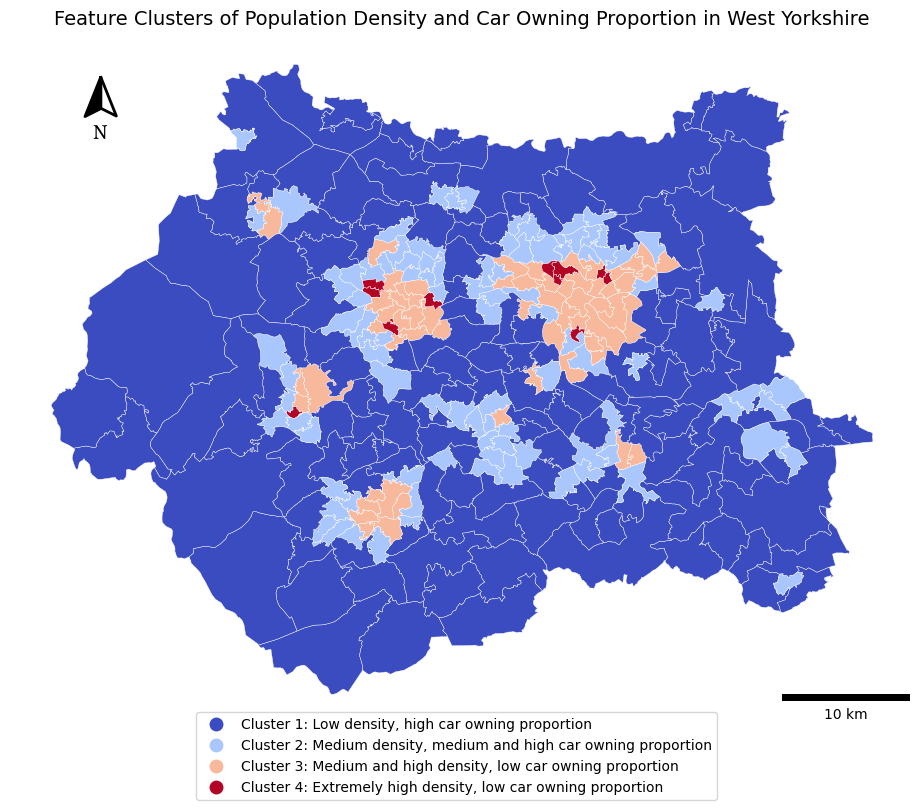

In [ ]:
#Spatial visualisation
f, ax = plt.subplots(1, figsize=(16, 9))
cds_v.plot(ax=ax, column='cluster_spv',
           cmap='coolwarm',
           linewidth=0.3, edgecolor='white',
           legend=True)

#Hide axes
ax.set_axis_off()

#Set title
ax.set_title('Feature Clusters of Population Density and Car Owning Proportion in West Yorkshire', fontsize=14)

#Set legend position
ax.get_legend().set_bbox_to_anchor((0.79, 0.03))

#Add scale bar and north arrow
s = ax.add_artist(ScaleBar(1, location='lower right'))
add_north_arrow(ax=ax, scale=.45, xlim_pos=0.1, ylim_pos=.88, color='#000', text_scaler=2.5, text_yT=-2)


This map interprets the modeling results spatially, and indicates the relationship between characterstics of population density, car ownership and urbanisation. MSOAs in cluster 3 are aggregrated at urban areas, while MSOAs in cluster 4 could be the most populated residential areas in the urban. In such dense urban areas, congested roads and parking spaces, better access to public transport, and high cost of car usage leads to less car owning<a href="#ref2">[2]</a><a href="#ref3">[3]</a>. MSOAs in cluster 2 could be at edge of urbans or town centres, where population density and car owning proportion are medium. MSOAs in cluster 1 are likely to be the less urbanised areas with low density and high car owning proportion, where common travelling distances are long and alterantive transport options are limited<a href="#ref3">[3]</a>.  

## Conclusion
To summarise, negative relationship between population density and car owning proportion is observed in West Yorkshire, and pattern of such relationship is relevant to urbanization. The MSOAs with higher population density and lower car owning proportions are aggregated in urban areas, while characteristics of less urbanised MSOAs are opposite to which of the urbanised ones.

## References
<p><a href="https://doi.org/10.1093/jeg/lbab047">[1]</a>Ostermeijer, F., Koster, H.R.A., van Ommeren, J. and Nielsen, V.M. 2022. Automobiles and urban density. *Journal of Economic Geography.*  [Online]. 22(5), pp.1073-1095. [Accessed 10 May 2025]. Available from: https://doi.org/10.1093/jeg/lbab047
</p>
<p><a href="https://doi.org/10.1016/j.tra.2018.09.021">[2]</a>Melia, S., Chatterjee, K. and Stokes, G. 2018. Is the urbanisation of young adults reducing their driving? *Transportation Research Part A: Policy and Practice.*  [Online]. 118, pp.444-456. [Accessed 10 May 2025]. Available from: https://doi.org/10.1016/j.tra.2018.09.021
</p>
<p><a href="https://doi.org/10.1016/j.tra.2005.03.002">[3]</a>Giuliano, G. and Dargay, J. 2006. Car ownership, travel and land use: a comparison of the US and Great Britain. *Transportation Research Part A: Policy and Practice.*   [Online]. 40(2), pp.106-124. [Accessed 10 May 2025]. Available from:  https://doi.org/10.1016/j.tra.2005.03.002
</p>


## Appendix
GitHub link of the project: https://github.com/FanjunGeng/Final_Project_GEOG5990_201900628

No use of Gen AI


